In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
staff_empathy = ctrl.Antecedent(np.arange(0, 11, 1), 'Staff empathy')
staff_reliability = ctrl.Antecedent(np.arange(0, 11, 1), 'Staff reliability')
food_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'Food quality')
tip = ctrl.Consequent(np.arange(0, 31, 1), 'Final tip')

In [6]:
staff_empathy['Mean'] = fuzz.trapmf(staff_empathy.universe, [0, 0, 2, 4])
staff_empathy['Neutral'] = fuzz.trapmf(staff_empathy.universe, [3, 4, 6, 7])
staff_empathy['Kind'] = fuzz.trapmf(staff_empathy.universe, [6, 8, 10, 10])

staff_reliability['Unreliable'] = fuzz.trapmf(staff_reliability.universe, [0, 0, 2, 4])
staff_reliability['Rather reliable'] = fuzz.trapmf(staff_reliability.universe, [3, 4, 6, 7])
staff_reliability['Reliable'] = fuzz.trapmf(staff_reliability.universe, [6, 8, 10, 10])

food_quality['Total garbage'] = fuzz.trapmf(food_quality.universe, [0, 0, 2, 4])
food_quality['Nothing special'] = fuzz.trapmf(food_quality.universe, [3, 4, 6, 7])
food_quality['Delicious'] = fuzz.trapmf(food_quality.universe, [6, 8, 10, 10])

In [8]:
tip["Category 0"] = fuzz.trapmf(tip.universe, [0, 0, 1, 2])
tip["Category 1"] = fuzz.trapmf(tip.universe, [1, 2, 3, 4])
tip["Category 2"] = fuzz.trapmf(tip.universe, [3, 4, 5, 6])
tip["Category 3"] = fuzz.trapmf(tip.universe, [5, 6, 7, 8])
tip["Category 4"] = fuzz.trapmf(tip.universe, [7, 8, 9, 10])
tip["Category 5"] = fuzz.trapmf(tip.universe, [9, 10, 11, 12])
tip["Category 6"] = fuzz.trapmf(tip.universe, [11, 12, 13, 14])
tip["Category 7"] = fuzz.trapmf(tip.universe, [13, 14, 15, 16])
tip["Category 8"] = fuzz.trapmf(tip.universe, [15, 16, 17, 18])
tip["Category 9"] = fuzz.trapmf(tip.universe, [17, 18, 19, 20])
tip["Category 10"] = fuzz.trapmf(tip.universe, [19, 20, 21, 22])
tip["Category 11"] = fuzz.trapmf(tip.universe, [21, 22, 23, 24])
tip["Category 12"] = fuzz.trapmf(tip.universe, [23, 24, 25, 26])
tip["Category 13"] = fuzz.trapmf(tip.universe, [25, 26, 27, 28])
tip["Category 14"] = fuzz.trapmf(tip.universe, [28, 29, 30, 31])

/mnt/86EA3992EA39800B/venvs/python3.5/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


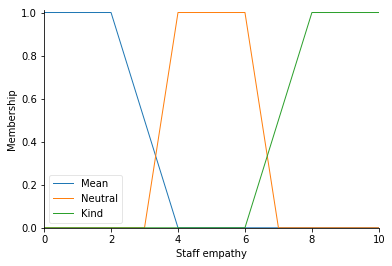

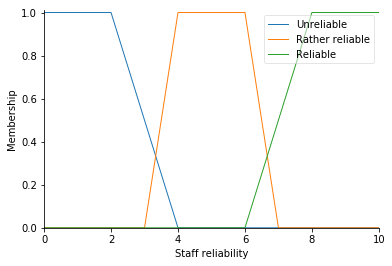

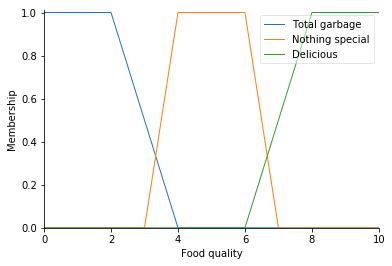

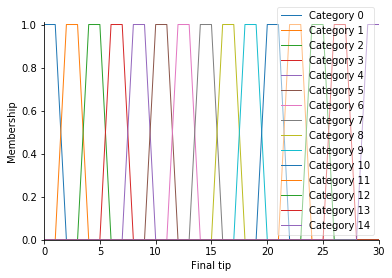

In [9]:
staff_empathy.view()
staff_reliability.view()
food_quality.view()
tip.view()

In [11]:
rule0 = ctrl.Rule((staff_empathy['Mean'] & food_quality['Total garbage'] & staff_reliability['Unreliable']) | (staff_empathy['Neutral'] & food_quality['Total garbage'] & staff_reliability['Unreliable']), tip["Category 0"])
rule1 = ctrl.Rule((staff_empathy['Mean'] & food_quality['Total garbage'] & staff_reliability['Rather reliable']) | (staff_empathy['Kind'] & food_quality['Total garbage'] & staff_reliability['Unreliable']), tip["Category 1"])
rule2 = ctrl.Rule((staff_empathy['Neutral'] & food_quality['Total garbage'] & staff_reliability['Rather reliable']) | (staff_empathy['Kind'] & food_quality['Total garbage'] & staff_reliability['Rather reliable']), tip["Category 2"])
rule3 = ctrl.Rule((staff_empathy['Mean'] & food_quality['Total garbage'] & staff_reliability['Reliable']) | (staff_empathy['Neutral'] & food_quality['Total garbage'] & staff_reliability['Reliable']), tip["Category 3"])
rule4 = ctrl.Rule((staff_empathy['Mean'] & food_quality['Nothing special'] & staff_reliability['Unreliable']) | (staff_empathy['Kind'] & food_quality['Total garbage'] & staff_reliability['Reliable']), tip["Category 4"])
rule5 = ctrl.Rule((staff_empathy['Neutral'] & food_quality['Nothing special'] & staff_reliability['Unreliable']) | (staff_empathy['Kind'] & food_quality['Nothing special'] & staff_reliability['Unreliable']), tip["Category 5"])
rule6 = ctrl.Rule((staff_empathy['Mean'] & food_quality['Nothing special'] & staff_reliability['Rather reliable']) | (staff_empathy['Neutral'] & food_quality['Nothing special'] & staff_reliability['Rather reliable']), tip["Category 6"])
rule7 = ctrl.Rule((staff_empathy['Mean'] & food_quality['Nothing special'] & staff_reliability['Reliable']) | (staff_empathy['Kind'] & food_quality['Nothing special'] & staff_reliability['Rather reliable']), tip["Category 7"])
rule8 = ctrl.Rule((staff_empathy['Neutral'] & food_quality['Nothing special'] & staff_reliability['Reliable']) | (staff_empathy['Kind'] & food_quality['Nothing special'] & staff_reliability['Reliable']), tip["Category 8"])
rule9 = ctrl.Rule((staff_empathy['Mean'] & food_quality['Delicious'] & staff_reliability['Unreliable']) | (staff_empathy['Neutral'] & food_quality['Delicious'] & staff_reliability['Unreliable']), tip["Category 9"])
rule10 = ctrl.Rule((staff_empathy['Mean'] & food_quality['Delicious'] & staff_reliability['Rather reliable']) | (staff_empathy['Kind'] & food_quality['Delicious'] & staff_reliability['Unreliable']), tip["Category 10"])
rule11 = ctrl.Rule((staff_empathy['Neutral'] & food_quality['Delicious'] & staff_reliability['Reliable']) | (staff_empathy['Kind'] & food_quality['Delicious'] & staff_reliability['Rather reliable']), tip["Category 11"])
rule12 = ctrl.Rule((staff_empathy['Mean'] & food_quality['Delicious'] & staff_reliability['Reliable']), tip["Category 12"])
rule13 = ctrl.Rule(staff_empathy['Neutral'] & food_quality['Delicious'] & staff_reliability['Rather reliable'], tip["Category 13"])
rule14 = ctrl.Rule(staff_empathy['Kind'] & food_quality['Delicious'] & staff_reliability['Reliable'], tip["Category 14"])

In [12]:
tip_fis = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
tip_sim = ctrl.ControlSystemSimulation(tip_fis)

29.119047619047617

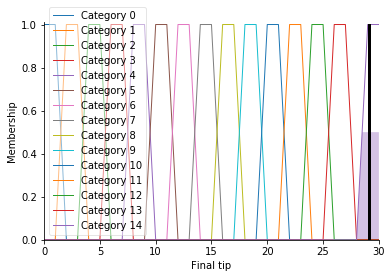

In [15]:
tip_sim.input['Staff empathy'] = 8
tip_sim.input['Staff reliability'] = 7
tip_sim.input['Food quality'] = 9

tip_sim.compute()
tip.view(sim=tip_sim)
tip_sim.output['Final tip']

14.5

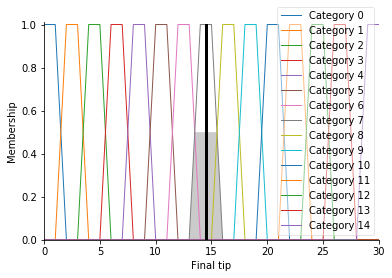

In [16]:
tip_sim.input['Staff empathy'] = 7
tip_sim.input['Staff reliability'] = 5
tip_sim.input['Food quality'] = 6

tip_sim.compute()
tip.view(sim=tip_sim)
tip_sim.output['Final tip']

1.313140631406314

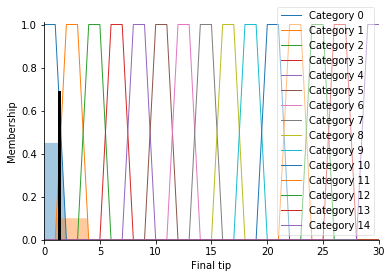

In [17]:
tip_sim.input['Staff empathy'] = 2.3
tip_sim.input['Staff reliability'] = 3.1
tip_sim.input['Food quality'] = 1.2

tip_sim.compute()
tip.view(sim=tip_sim)
tip_sim.output['Final tip']